<a href="https://colab.research.google.com/github/palomalomaz/QM_finalproject/blob/main/Step1_descriptive_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing data, crime rate data**

In [ ]:
import pandas as pd
import gdown

# Direct download link for the crime_cleaned_final.csv file
file_id = "1Dy-eciO2EXLkgbmP1FRoQrYt9p_qkMj6"
file_url = f"https://drive.google.com/uc?id={file_id}"

# Download and read the CSV file
df = pd.read_csv(file_url)

# Display basic information about the dataset
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

Dataset loaded successfully!
Shape: (33727, 9)
Columns: ['MajorText', 'MinorText', 'BoroughName', 'YearMonth', 'CrimeCount', 'Year', 'mnemonic', 'Population', 'CrimeRate']

First few rows:
                   MajorText                        MinorText BoroughName  \
0  ARSON AND CRIMINAL DAMAGE                            ARSON       Brent   
1  ARSON AND CRIMINAL DAMAGE                  CRIMINAL DAMAGE       Brent   
2                   BURGLARY  BURGLARY BUSINESS AND COMMUNITY       Brent   
3                   BURGLARY                DOMESTIC BURGLARY       Brent   
4                   BURGLARY           RES BURGLARY OF A HOME       Brent   

   YearMonth  CrimeCount  Year   mnemonic  Population  CrimeRate  
0     201701           3  2017  E09000005      342439   0.000876  
1     201701         155  2017  E09000005      342439   0.045264  
2     201701          56  2017  E09000005      342439   0.016353  
3     201701         195  2017  E09000005      342439   0.056944  
4     201701 

In [ ]:
sexual_offences_df = df[df['MajorText'] == 'SEXUAL OFFENCES']
selected_boroughs = [
    'Camden', 'Islington', 'Hackney', 'Tower Hamlets', 'Greenwich',
    'Southwark', 'Lambeth', 'Hammersmith and Fulham', 'Kensington and Chelsea',
    'Westminster', 'Brent'
]

filtered_boroughs_df = df[df['BoroughName'].isin(selected_boroughs)]
sexual_offences_crime_rate_by_borough_year = sexual_offences_df.groupby(['BoroughName', 'Year'])['CrimeRate'].sum().reset_index()
print(sexual_offences_crime_rate_by_borough_year.head())

  BoroughName  Year  CrimeRate
0       Brent  2017   0.181346
1       Brent  2018   0.182893
2       Brent  2019   0.187667
3       Brent  2020   0.170936
4       Brent  2021   0.193369


**Plot of Total Sexual Offences Crime Rate by Borough Over Years**

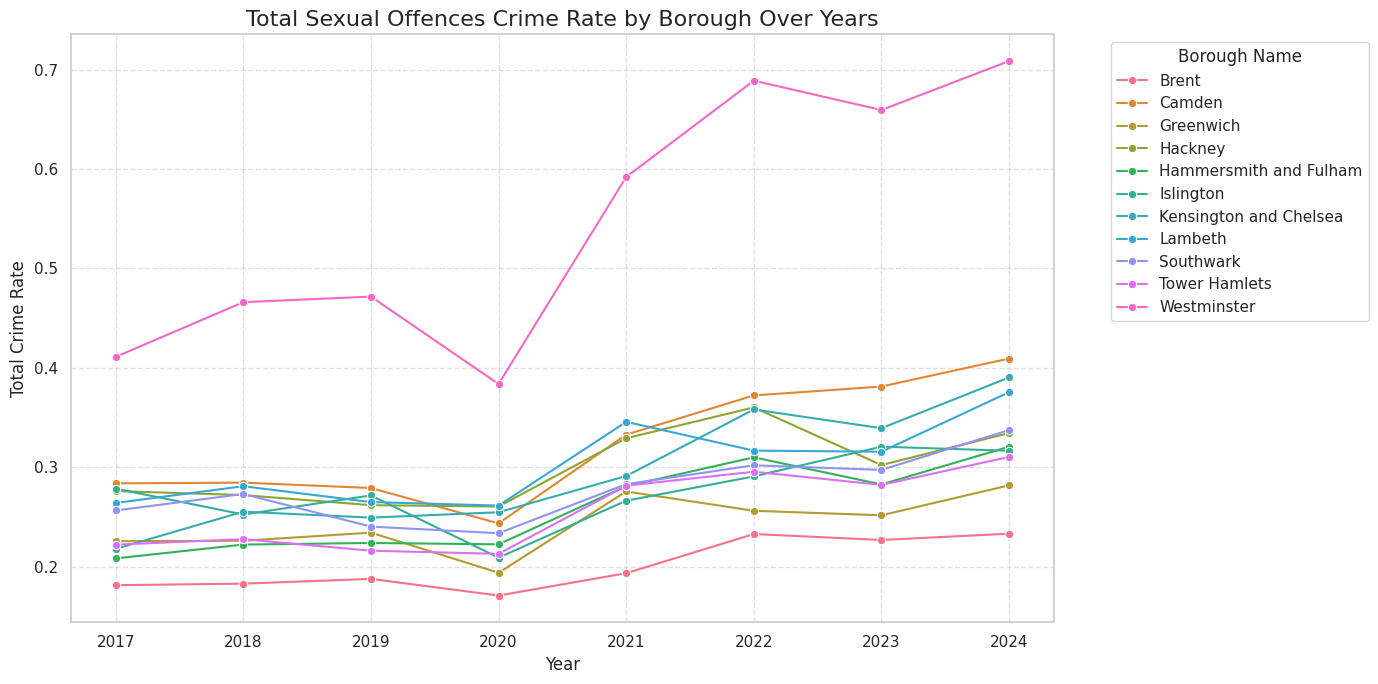

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
# Create a line plot with 'Year' on the x-axis, 'CrimeRate' on the y-axis
# and different lines for each 'BoroughName'
sns.lineplot(
    data=sexual_offences_crime_rate_by_borough_year,
    x='Year',
    y='CrimeRate',
    hue='BoroughName',
    marker='o' # Add markers for each data point
)

plt.title('Total Sexual Offences Crime Rate by Borough Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crime Rate', fontsize=12)
plt.xticks(sexual_offences_crime_rate_by_borough_year['Year'].unique()) # Ensure all years are shown as ticks
plt.legend(title='Borough Name', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

**Descriptive statistics for average sexual offences crime rate by borough**

In [ ]:
print("Descriptive statistics for average sexual offences crime rate by borough:")
display(average_sexual_offences_crime_rate_by_borough.describe())

Descriptive statistics for average sexual offences crime rate by borough:


,CrimeRate
count,11.000000
mean,0.298251
std,0.089214
min,0.201122
25%,0.257444
50%,0.277878
75%,0.301303
max,0.547639


**Descriptive statistics for sexual offences crime rate for each borough (over the years)**

In [ ]:
print("Descriptive statistics for sexual offences crime rate for each borough (over the years):")
display(sexual_offences_crime_rate_by_borough_year.groupby('BoroughName')['CrimeRate'].describe())

Descriptive statistics for sexual offences crime rate for each borough (over the years):


,count,mean,std,min,25%,50%,75%,max
BoroughName,,,,,,,,
Brent,8.0,0.201122,0.025537,0.170936,0.182506,0.190518,0.228305,0.233160
Camden,8.0,0.323292,0.059299,0.243519,0.282605,0.308633,0.374444,0.409324
Greenwich,8.0,0.243115,0.029033,0.193839,0.225937,0.242939,0.261033,0.281777
Hackney,8.0,0.299515,0.037868,0.260442,0.269431,0.289097,0.330442,0.360179
Hammersmith and Fulham,8.0,0.258872,0.044630,0.208289,0.222386,0.252372,0.289517,0.320637
Islington,8.0,0.275738,0.035896,0.209033,0.262830,0.275070,0.297209,0.320690
Kensington and Chelsea,8.0,0.294481,0.061259,0.217840,0.253356,0.273199,0.343959,0.390263
Lambeth,8.0,0.303092,0.042428,0.261422,0.264712,0.298268,0.323925,0.375489
Southwark,8.0,0.277878,0.034596,0.233613,0.252414,0.278035,0.298464,0.337372


**Detecting anomalies**

In [ ]:
borough_stats = sexual_offences_crime_rate_by_borough_year.groupby('BoroughName')['CrimeRate'].agg(
    MeanCrimeRate='mean',
    StdCrimeRate='std'
).reset_index()

print("Borough-level crime rate statistics:")
print(borough_stats.head())

Borough-level crime rate statistics:
              BoroughName  MeanCrimeRate  StdCrimeRate
0                   Brent       0.201122      0.025537
1                  Camden       0.323292      0.059299
2               Greenwich       0.243115      0.029033
3                 Hackney       0.299515      0.037868
4  Hammersmith and Fulham       0.258872      0.044630


In [ ]:
df_merged = pd.merge(sexual_offences_crime_rate_by_borough_year, borough_stats, on='BoroughName', how='left')
print("Merged DataFrame with borough-level statistics:")
print(df_merged.head())

Merged DataFrame with borough-level statistics:
  BoroughName  Year  CrimeRate  MeanCrimeRate  StdCrimeRate
0       Brent  2017   0.181346       0.201122      0.025537
1       Brent  2018   0.182893       0.201122      0.025537
2       Brent  2019   0.187667       0.201122      0.025537
3       Brent  2020   0.170936       0.201122      0.025537
4       Brent  2021   0.193369       0.201122      0.025537


In [ ]:
num_std_dev = 2

df_merged['UpperBound'] = df_merged['MeanCrimeRate'] + num_std_dev * df_merged['StdCrimeRate']
df_merged['LowerBound'] = df_merged['MeanCrimeRate'] - num_std_dev * df_merged['StdCrimeRate']

df_merged['IsAnomaly'] = (df_merged['CrimeRate'] > df_merged['UpperBound']) | \
                        (df_merged['CrimeRate'] < df_merged['LowerBound'])

print("DataFrame with anomaly flags and bounds:")
print(df_merged.head())

DataFrame with anomaly flags and bounds:
  BoroughName  Year  CrimeRate  MeanCrimeRate  StdCrimeRate  UpperBound  \
0       Brent  2017   0.181346       0.201122      0.025537    0.252196   
1       Brent  2018   0.182893       0.201122      0.025537    0.252196   
2       Brent  2019   0.187667       0.201122      0.025537    0.252196   
3       Brent  2020   0.170936       0.201122      0.025537    0.252196   
4       Brent  2021   0.193369       0.201122      0.025537    0.252196   

   LowerBound  IsAnomaly  
0    0.150047      False  
1    0.150047      False  
2    0.150047      False  
3    0.150047      False  
4    0.150047      False  


In [ ]:
anomalies_df = df_merged[df_merged['IsAnomaly'] == True]
print("Anomalous data points:")
display(anomalies_df)

Anomalous data points:


,BoroughName,Year,CrimeRate,MeanCrimeRate,StdCrimeRate,UpperBound,LowerBound,IsAnomaly


There are no anomalies in our data

**Importing data, rent prices**

In [ ]:
file_id2 = "1rI728hY2w0VuhP5H9Y9_3Vsoax1Hcp1w"
file_url2 = f"https://drive.google.com/uc?id={file_id2}"

# Download and read the CSV file
df = pd.read_csv(file_url2)

In [ ]:
selected_boroughs = [
    'Camden', 'Islington', 'Hackney', 'Tower Hamlets', 'Greenwich',
    'Southwark', 'Lambeth', 'Hammersmith and Fulham', 'Kensington and Chelsea',
    'Westminster', 'Brent'
]

# Filter the rent DataFrame to include only the selected boroughs
filtered_rent_df = df[df['Borough'].isin(selected_boroughs)]

print("Monthly rent data filtered for selected boroughs:")
print(filtered_rent_df.head())

Monthly rent data filtered for selected boroughs:
                   Borough  Mean_Monthly_Rent
3                    Brent               2006
5                   Camden               2615
10               Greenwich               1866
11                 Hackney               2478
12  Hammersmith and Fulham               2516


**Mean Monthly Rent by Selected London Boroughs Graph**

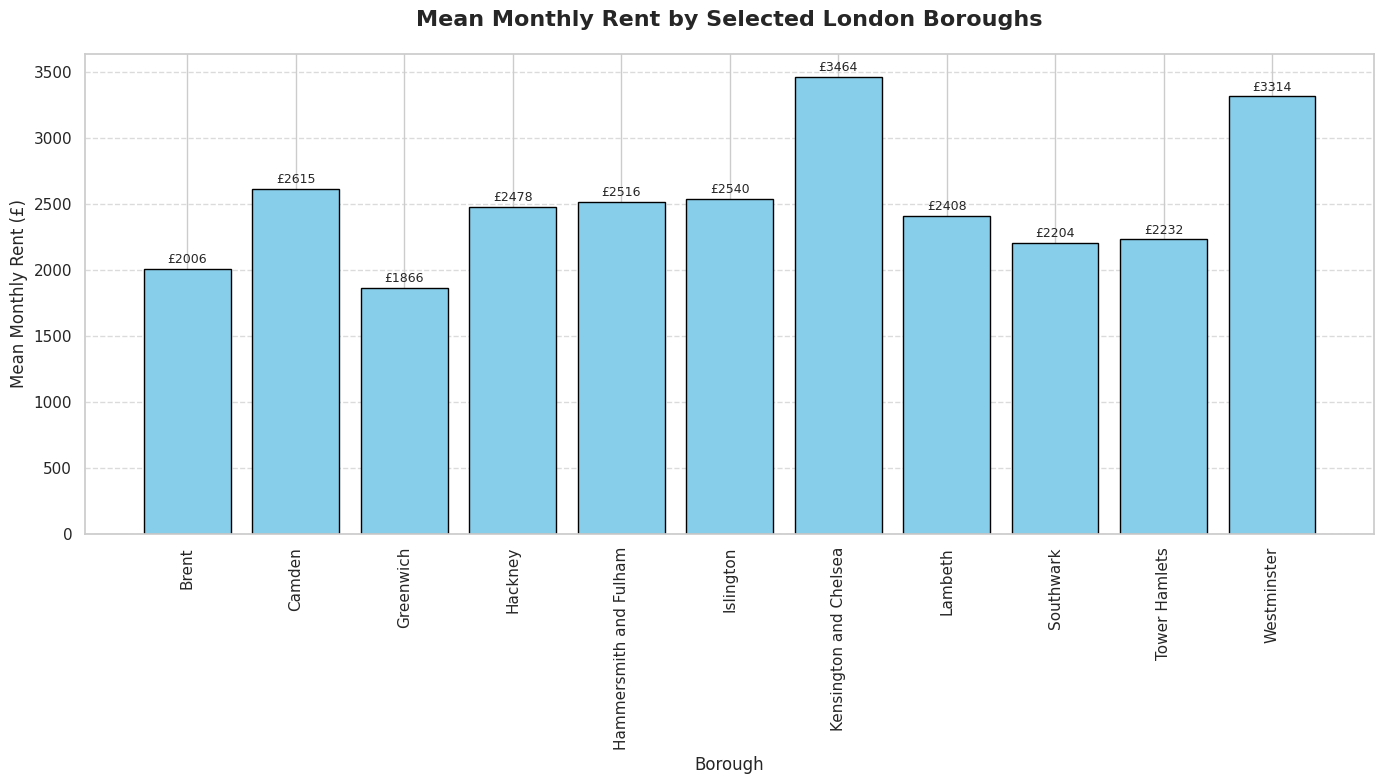


RENT DATA SUMMARY FOR SELECTED BOROUGHS:
Highest Rent: £3464 (Kensington and Chelsea)
Lowest Rent:  £1866 (Greenwich)
Average Rent: £2513


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Assuming filtered_rent_df is already defined from a previous cell
# If not, ensure the cell creating filtered_rent_df runs before this one
if 'filtered_rent_df' not in locals() and 'filtered_rent_df' not in globals():
    print("Error: filtered_rent_df is not defined. Please run the cell that creates filtered_rent_df first.")
else:
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create a bar plot: Boroughs on the x-axis, rent on the y-axis
    bars = ax.bar(filtered_rent_df['Borough'], filtered_rent_df['Mean_Monthly_Rent'], color='skyblue', edgecolor='black')

    # Customize the plot
    ax.set_title('Mean Monthly Rent by Selected London Boroughs', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Borough', fontsize=12)
    ax.set_ylabel('Mean Monthly Rent (£)', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='center')

    # Add grid for easier value reading (on y-axis only)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)

    # Optional: Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 20,
                f'£{int(height)}', ha='center', va='bottom', fontsize=9)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print some basic statistics from the data
    print("\n" + "="*50)
    print("RENT DATA SUMMARY FOR SELECTED BOROUGHS:")
    print("="*50)
    print(f"Highest Rent: £{filtered_rent_df['Mean_Monthly_Rent'].max():.0f} ({filtered_rent_df.loc[filtered_rent_df['Mean_Monthly_Rent'].idxmax(), 'Borough']})")
    print(f"Lowest Rent:  £{filtered_rent_df['Mean_Monthly_Rent'].min():.0f} ({filtered_rent_df.loc[filtered_rent_df['Mean_Monthly_Rent'].idxmin(), 'Borough']})")
    print(f"Average Rent: £{filtered_rent_df['Mean_Monthly_Rent'].mean():.0f}")

**Rent distribution analysis**

In [ ]:
import numpy as np
import pandas as pd

print("=" * 80)
print("RENT PRICES DATASET (SELECTED BOROUGHS) - COMPREHENSIVE DESCRIPTIVE STATISTICS")
print("=" * 80)

print(f"\n1. BASIC DATASET INFORMATION")
print("-" * 40)
print(f"Dataset shape: {filtered_rent_df.shape}")
print(f"Number of boroughs (rows): {filtered_rent_df.shape[0]}")
print(f"Number of columns: {filtered_rent_df.shape[1]}")
print(f"\nColumn names and data types:")
print(filtered_rent_df.dtypes.to_string())

print(f"\n\n3. DESCRIPTIVE STATISTICS FOR MEAN MONTHLY RENT (£)")
print("-" * 40)

# Calculate comprehensive descriptive statistics
rent_data = filtered_rent_df['Mean_Monthly_Rent']

# Basic statistics
stats = {
    'Count': len(rent_data),
    'Mean': np.mean(rent_data),
    'Median': np.median(rent_data),
    'Mode': rent_data.mode().iloc[0] if not rent_data.mode().empty else 'N/A',
    'Std Deviation': np.std(rent_data, ddof=1),
    'Variance': np.var(rent_data, ddof=1),
    'Minimum': np.min(rent_data),
    '25th Percentile': np.percentile(rent_data, 25),
    '50th Percentile (Median)': np.percentile(rent_data, 50),
    '75th Percentile': np.percentile(rent_data, 75),
    'Maximum': np.max(rent_data),
    'Range': np.max(rent_data) - np.min(rent_data),
    'IQR (Interquartile Range)': np.percentile(rent_data, 75) - np.percentile(rent_data, 25),
    'Skewness': rent_data.skew(),
    'Kurtosis': rent_data.kurtosis(),
    'Coefficient of Variation': (np.std(rent_data, ddof=1) / np.mean(rent_data)) * 100
}

# Create formatted output
stats_df = pd.DataFrame(list(stats.items()), columns=['Statistic', 'Value'])

# Format numeric values
def format_stat(val):
    if isinstance(val, (int, np.integer)):
        return f"£{val:,}"
    elif isinstance(val, float):
        if abs(val) < 0.01:
            return f"{val:.4f}"
        elif abs(val) < 1:
            return f"{val:.3f}"
        elif abs(val) < 1000:
            return f"£{val:,.2f}"
        else:
            return f"£{val:,.0f}"
    else:
        return str(val)

stats_df['Formatted Value'] = stats_df['Value'].apply(format_stat)
print(stats_df[['Statistic', 'Formatted Value']].to_string(index=False))

print(f"\n\n4. RENT DISTRIBUTION ANALYSIS")
print("-" * 40)

# Create rent categories
rent_min = int(np.min(rent_data))
rent_max = int(np.max(rent_data))
rent_range = rent_max - rent_min
bin_width = 250
bins = list(range(rent_min - rent_min % bin_width, rent_max + bin_width, bin_width))

# Create histogram data
hist, bin_edges = np.histogram(rent_data, bins=bins)

print(f"Rent range: £{rent_min:,} to £{rent_max:,} (span: £{rent_range:,})")
print(f"Bin size: £{bin_width}")

print("\nRent distribution by £250 brackets:")
for i in range(len(hist)):
    if hist[i] > 0:
        lower = bin_edges[i]
        upper = bin_edges[i+1]
        count = hist[i]
        pct = (count / len(rent_data)) * 100
        print(f"  £{lower:,.0f} - £{upper:,.0f}: {count} boroughs ({pct:.1f}%)")

print(f"\n\n5. TOP 5 MOST EXPENSIVE BOROUGHS")
print("-" * 40)
top_5 = filtered_rent_df.nlargest(5, 'Mean_Monthly_Rent')[['Borough', 'Mean_Monthly_Rent']].copy()
top_5['Rank'] = range(1, len(top_5) + 1)
top_5['Difference from Average'] = top_5['Mean_Monthly_Rent'] - stats['Mean']
print(top_5[['Rank', 'Borough', 'Mean_Monthly_Rent', 'Difference from Average']].to_string(index=False))

print(f"\n\n6. TOP 5 MOST AFFORDABLE BOROUGHS")
print("-" * 40)
bottom_5 = filtered_rent_df.nsmallest(5, 'Mean_Monthly_Rent')[['Borough', 'Mean_Monthly_Rent']].copy()
bottom_5['Rank'] = range(1, len(bottom_5) + 1)
bottom_5['Difference from Average'] = bottom_5['Mean_Monthly_Rent'] - stats['Mean']
print(bottom_5[['Rank', 'Borough', 'Mean_Monthly_Rent', 'Difference from Average']].to_string(index=False))

print(f"\n\n7. SUMMARY STATISTICS BY PRICE QUARTILE")
print("-" * 40)

# Identify boroughs in each quartile
q1_threshold = stats['25th Percentile']
q2_threshold = stats['50th Percentile (Median)']
q3_threshold = stats['75th Percentile']

q1_boroughs = filtered_rent_df[filtered_rent_df['Mean_Monthly_Rent'] <= q1_threshold]
q2_boroughs = filtered_rent_df[(filtered_rent_df['Mean_Monthly_Rent'] > q1_threshold) & (filtered_rent_df['Mean_Monthly_Rent'] <= q2_threshold)]
q3_boroughs = filtered_rent_df[(filtered_rent_df['Mean_Monthly_Rent'] > q2_threshold) & (filtered_rent_df['Mean_Monthly_Rent'] <= q3_threshold)]
q4_boroughs = filtered_rent_df[filtered_rent_df['Mean_Monthly_Rent'] > q3_threshold]

print(f"Bottom 25% (≤ £{q1_threshold:,.0f}): {len(q1_boroughs)} boroughs")
print(f"  Examples: {', '.join(q1_boroughs['Borough'].head(3).tolist())}...")

print(f"\n25-50% (£{q1_threshold:,.0f} - £{q2_threshold:,.0f}): {len(q2_boroughs)} boroughs")
print(f"  Examples: {', '.join(q2_boroughs['Borough'].head(3).tolist())}...")

print(f"\n50-75% (£{q2_threshold:,.0f} - £{q3_threshold:,.0f}): {len(q3_boroughs)} boroughs")
print(f"  Examples: {', '.join(q3_boroughs['Borough'].head(3).tolist())}...")

print(f"\nTop 25% (> £{q3_threshold:,.0f}): {len(q4_boroughs)} boroughs")
print(f"  Examples: {', '.join(q4_boroughs['Borough'].head(3).tolist())}...")

print(f"\n\n8. DATA QUALITY ASSESSMENT")
print("-" * 40)
print(f"Missing values in 'Borough' column: {filtered_rent_df['Borough'].isnull().sum()}")
print(f"Missing values in 'Mean_Monthly_Rent' column: {filtered_rent_df['Mean_Monthly_Rent'].isnull().sum()}")
print(f"Duplicate borough names: {filtered_rent_df['Borough'].duplicated().sum()}")
print(f"All borough names are unique: {filtered_rent_df['Borough'].nunique() == len(filtered_rent_df)}")

print(f"\n\n9. KEY INSIGHTS")
print("-" * 40)
print(f"1. Rent prices range from £{rent_min:,} to £{rent_max:,}, a difference of £{rent_range:,}.")
print(f"2. The average monthly rent across all boroughs is £{stats['Mean']:,.0f}.")
print(f"3. The median rent is £{stats['Median']:,.0f}, which is {'higher' if stats['Median'] > stats['Mean'] else 'lower'} than the mean.")
print(f"4. Standard deviation is £{stats['Std Deviation']:,.0f}, indicating {'moderate' if stats['Std Deviation']/stats['Mean'] < 0.3 else 'high'} variability.")
print(f"5. Skewness is {stats['Skewness']:.2f}, indicating the distribution is {'slightly right-skewed' if 0.5 < stats['Skewness'] < 1 else 'moderately right-skewed' if 1 <= stats['Skewness'] < 2 else 'highly right-skewed' if stats['Skewness'] >= 2 else 'approximately symmetric' if -0.5 <= stats['Skewness'] <= 0.5 else 'left-skewed'}.")
print(f"6. The most expensive borough ({top_5.iloc[0]['Borough']}) is {top_5.iloc[0]['Mean_Monthly_Rent']/bottom_5.iloc[0]['Mean_Monthly_Rent']:.1f} times more expensive than the most affordable ({bottom_5.iloc[0]['Borough']}).")

RENT PRICES DATASET (SELECTED BOROUGHS) - COMPREHENSIVE DESCRIPTIVE STATISTICS

1. BASIC DATASET INFORMATION
----------------------------------------
Dataset shape: (11, 2)
Number of boroughs (rows): 11
Number of columns: 2

Column names and data types:
Borough              object
Mean_Monthly_Rent     int64


3. DESCRIPTIVE STATISTICS FOR MEAN MONTHLY RENT (£)
----------------------------------------
                Statistic Formatted Value
                    Count          £11.00
                     Mean          £2,513
                   Median          £2,478
                     Mode          £1,866
            Std Deviation         £491.88
                 Variance        £241,949
                  Minimum          £1,866
          25th Percentile          £2,218
 50th Percentile (Median)          £2,478
          75th Percentile          £2,578
                  Maximum          £3,464
                    Range          £1,598
IQR (Interquartile Range)         £359.50
       